# Gaussian Quadratures and Legendre polynomials

imports:

In [2]:
import karhunenLoeve as kl
from matplotlib import pyplot as plt
from matplotlib import colormaps
from matplotlib import colors
import numpy as np
import time
import graphSettings


# Calculating integrals using Gauss Quadrature rule and a Jacobi matrix

First we will attempt some integrations of basic functions

In [2]:
matrix_size=100
f = lambda x: x**2
fI = lambda x: x**3/3
real_integ_value = fI(1)-fI(-1)
Gq = kl.integ.quadrature(f,matrix_size)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", real_integ_value)
print("error:", np.abs(Gq - real_integ_value))

Gauss-quadrature: 0.6666666666666639
actual value of integral: 0.6666666666666666
error: 2.7755575615628914e-15


over interval (a,b)



In [3]:
matrix_size = 100
a = 10
b = 25
f = lambda x: np.sin(x)
fI = lambda x: -np.cos(x)
real_integ_value = fI(b)-fI(a)
Gq = kl.integ.quadrature_int(f, matrix_size, a, b)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", real_integ_value)
print("error:", np.abs(Gq - real_integ_value))

Gauss-quadrature: -1.8302743409399347
actual value of integral: -1.830274340939926
error: 8.659739592076221e-15


##### testing orthonormality of polynomials

In [4]:
matrix_size=100
n=11
f = lambda x: kl.integ.legendre_normal(x, 50)[n]*kl.integ.legendre_normal(x, 50)[n]
real_integ_value = 1
Gq = kl.integ.quadrature(f, matrix_size)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", real_integ_value)
print("error:", np.abs(Gq - real_integ_value))

Gauss-quadrature: 0.999999999999995
actual value of integral: 1
error: 4.9960036108132044e-15


In [5]:
a=4
b=20
matrix_size=100
n=11
f = lambda x: kl.integ.legendre_normal_int(x, 100, a, b)[n]*kl.integ.legendre_normal_int(x, 100, a, b)[n]
real_integ_value = 1
Gq = kl.integ.quadrature_int(f, matrix_size, a, b)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", real_integ_value)
print("error:", np.abs(Gq - real_integ_value))

Gauss-quadrature: 0.9999999999999948
actual value of integral: 1
error: 5.218048215738236e-15


#### testing simple convergence graphs 

We are showing the accuracy of the quadrature rule for different count of nodes. With more nodes used, the more accurate the result will get.

0.0


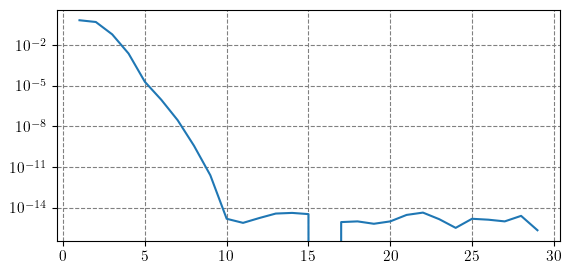

In [8]:
matrix_size = 30
def f(x): return np.exp(x)*np.sin(np.pi*x)
res = []
n_counts = range(1, matrix_size)
for i in n_counts:
    res.append(abs(kl.integ.quadrature(f, i) - 0.67932618340209469947815632370907306163177032877927709391270561911906360182))
plt.plot(n_counts,res)
plt.yscale('log')
print(res[15])

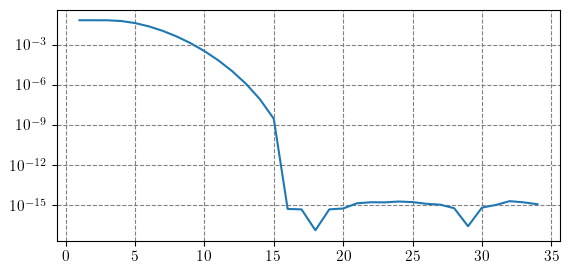

In [4]:
matrix_size=35
f = lambda x: x**30
fI = lambda x: x**31/31
res = []
n_counts = range(1, matrix_size)
for i in n_counts:
    res.append(abs(kl.integ.quadrature(f, i) - (fI(1)-fI(-1))))
plt.plot(n_counts,res)
plt.yscale('log')

over interval <a,b>

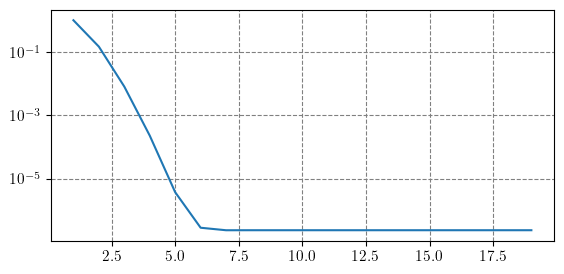

In [3]:
matrix_size=20
a = 5
b = 10
f = lambda x: np.sin(x)/np.log(5*x)
fI = 0.287556
res = []
n_counts = range(1, matrix_size)
for i in n_counts:
    res.append(abs(kl.integ.quadrature_int(f, i, a, b) - fI))
plt.plot(n_counts,res)
plt.yscale('log')

##### test of a non-smooth function:

In [5]:
f = lambda x: np.abs(x) + np.abs(x+0.5) - np.abs(x-0.5)
real_integ_value = 1

approx = []
difference = []
times = []
node_range = range(1,500)
for i in node_range:
    starttime = time.time()
    int_approx = kl.integ.quadrature(f, i)
    endtime = time.time()

    approx.append(int_approx)
    difference.append(np.abs(int_approx-real_integ_value))
    times.append(endtime-starttime)

The function to be used integrated:

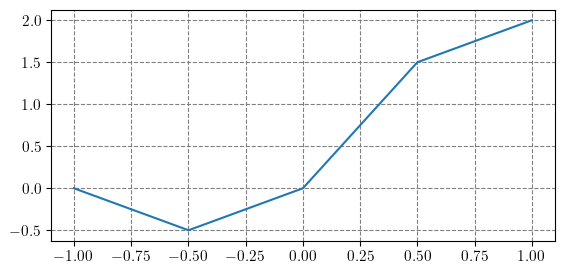

In [6]:
x = np.linspace(-1, 1, 1000)
plt.plot(x, f(x))

The results of integration in blue and the real value as an orange line:

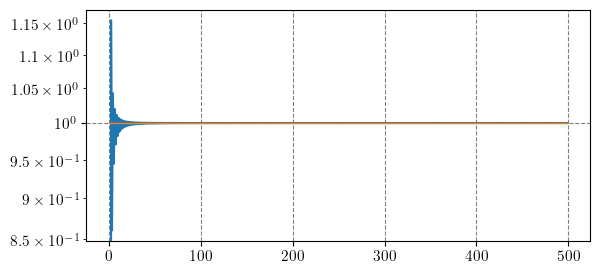

In [7]:
plt.plot(node_range,approx)
plt.plot(np.ones(500), '-', linewidth=1)
plt.yscale('log')

Konvergation graph of the approximate error:

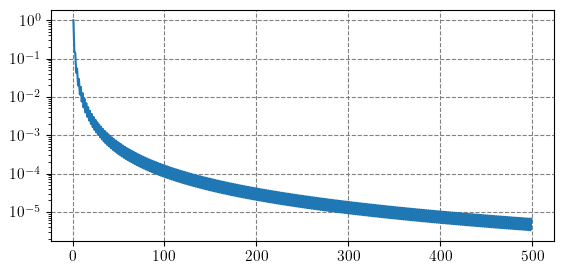

In [8]:
plt.plot(node_range,difference)
plt.yscale('log')

#### test of a discontinuous function:

In [10]:
f = lambda x: np.sign(x+0.5)
fI = 1
approx = []
difference = []
times = []
node_range = range(15,1000)
for i in node_range:
    starttime = time.time()
    int_approx = kl.integ.quadrature(f, i)
    endtime = time.time()

    approx.append(int_approx)
    difference.append(np.abs(int_approx-fI))
    times.append(endtime-starttime)


The results of integration in blue and the real value as an orange line:

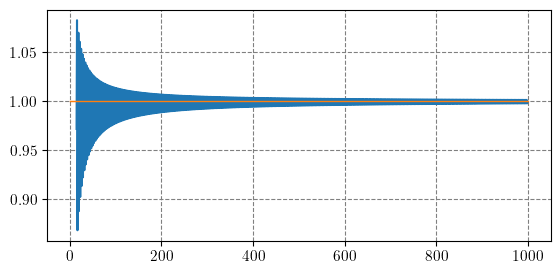

In [16]:

plt.plot(node_range,approx)
plt.plot(np.ones(1000), '-',  linewidth=1)
plt.show()

Convergence graph of the approximate error:

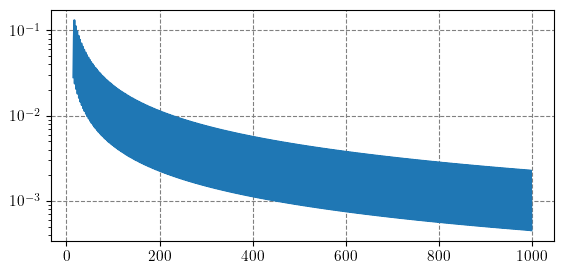

In [110]:
plt.plot(node_range,difference)
plt.yscale('log')
plt.show()

---
## Computational time

In [50]:
f = lambda x: x

number_of_tries = 50
times_size = 10
times = np.zeros(times_size)
node_range = np.logspace(2,4,times_size,dtype=int)
for j in range(number_of_tries):
    for i in range(times_size):
        starttime = time.time()
        int_approx = kl.integ.quadrature(f, node_range[i])
        endtime = time.time()
        times[i]+=(endtime-starttime)
times = times/number_of_tries
times # it takes 10 minutes all together

array([6.80179596e-04, 1.24023438e-03, 2.96071529e-03, 8.78191948e-03,
       2.63459826e-02, 7.50770092e-02, 2.19149270e-01, 6.96616178e-01,
       2.29945558e+00, 8.89353395e+00])

Graph made from the measured times.

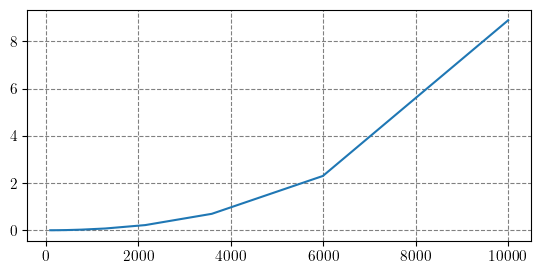

In [52]:
plt.plot(node_range,times)
plt.show()

Measured times put in a log-log graph with a linear fit

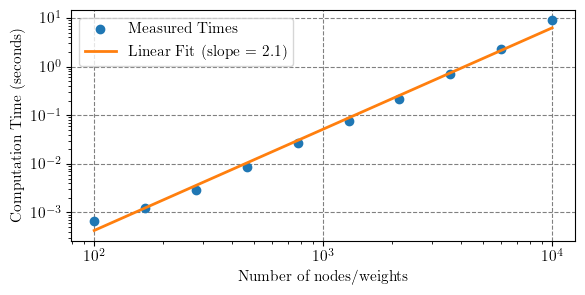

2.0835360990019205

In [54]:
n_values = node_range
log_n = np.log(n_values)
log_times = np.log(times)
coeffs = np.polyfit(log_n, log_times, 1)

slope = coeffs[0]
intercept = coeffs[1]
log_times_fit = slope * log_n + intercept
times_fit = np.exp(log_times_fit)
plt.loglog(n_values, times, 'o', label='Measured Times')
plt.loglog(n_values, times_fit, '-', label=f'Linear Fit (slope = {slope:.2})', linewidth=2)
plt.xlabel("Number of nodes/weights")
plt.ylabel("Computation Time (seconds)")
plt.legend()

plt.savefig("NodesWightsTime.pdf", bbox_inches='tight')

plt.show()
slope

#### Convergence in a log-lin graph

Polynomial:

In [79]:
f = lambda x: x**50 + x**4 - 4*x**3 - 15*x + 35
fI = lambda x: (x**51)/51 + (x**5)/5 - x**4 - (15/2)*x**2 + 35*x
real_integ_value = fI(1)-fI(-1)
difference = []
#node_range = np.array([5, 7, 10, 15, 20, 25])
node_range = range(5,30)
for i in node_range:
    int_approx = kl.integ.quadrature(f, i)
    difference.append(np.abs(int_approx-real_integ_value))

Function to be integrated on the left side and convergence graph of the approximate error on the right side

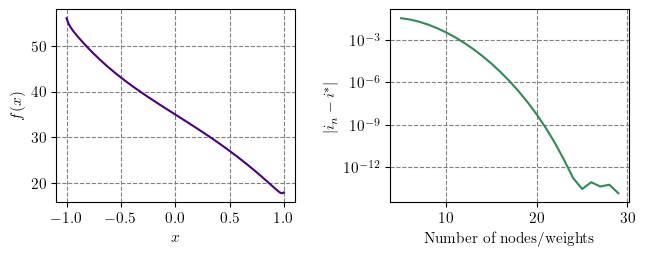

In [80]:
x = np.linspace(-1, 1, 1000)

fig, axs = plt.subplots(1, 2, figsize=(7.4, 2.5)) 
axs[0].set_ylabel(r"$f(x)$")
axs[0].set_xlabel(r"$x$")
axs[0].plot(x,f(x),color="indigo")

axs[1].set_ylabel(r"$\left|i_{n}-i^{*}\right|$")
axs[1].set_xlabel("Number of nodes/weights")
axs[1].plot(node_range,difference,color="seagreen")
axs[1].set_yscale('log')
fig.subplots_adjust(wspace=0.4)
fig.savefig("PolynomialInteg.pdf", bbox_inches='tight')
plt.show()

Smooth function:

In [63]:
f = lambda x: np.cos(x**2)
real_integ_value = 1.809048475800544162949576733665114291615983641191003479196640074902159185352954615877833522127454977
difference = []
node_range = range(1,15)
for i in node_range:
    int_approx = kl.integ.quadrature(f, i)
    difference.append(np.abs(int_approx-real_integ_value))

Function to be integrated on the left side and convergence graph of the approximate error on the right side

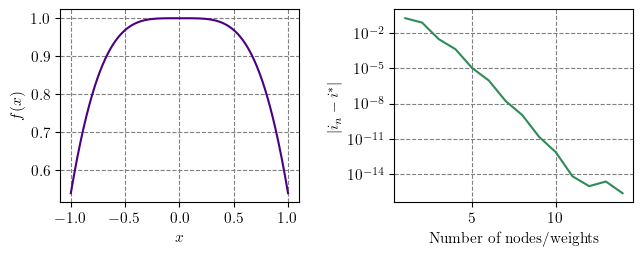

In [64]:
x = np.linspace(-1, 1, 1000)

fig, axs = plt.subplots(1, 2, figsize=(7.4, 2.5)) 
axs[0].set_ylabel(r"$f(x)$")
axs[0].set_xlabel(r"$x$")
axs[0].plot(x,f(x),color="indigo")

axs[1].set_ylabel(r"$\left|i_{n}-i^{*}\right|$")
axs[1].set_xlabel("Number of nodes/weights")
axs[1].plot(node_range,difference,color="seagreen")
axs[1].set_yscale('log')
fig.subplots_adjust(wspace=0.4)
fig.savefig("SmoothInteg.pdf", bbox_inches='tight')
plt.show()

Non-smooth function:

In [65]:
f = lambda x: np.abs(x) + np.abs(x+0.5) - np.abs(x-0.5)
real_integ_value = 1
difference = []
node_range = range(1,200)
for i in node_range:
    difference.append(abs(kl.integ.quadrature(f, i) - real_integ_value))

Function to be integrated on the left side and convergence graph of the approximate error on the right side

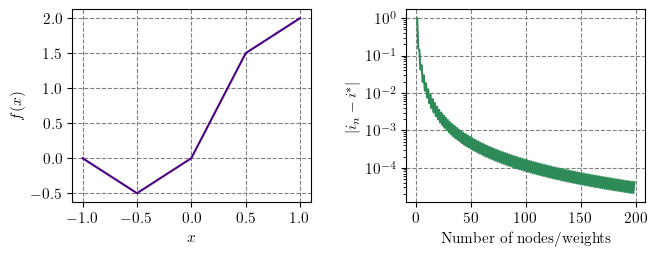

In [66]:
x = np.linspace(-1, 1, 1000)

fig, axs = plt.subplots(1, 2, figsize=(7.4, 2.5))
axs[0].set_ylabel(r"$f(x)$")
axs[0].set_xlabel(r"$x$")
axs[0].plot(x,f(x),color="indigo")

axs[1].set_ylabel(r"$\left|i_{n}-i^{*}\right|$")
axs[1].set_xlabel("Number of nodes/weights")
axs[1].plot(node_range,difference,color="seagreen")
axs[1].set_yscale('log')
fig.subplots_adjust(wspace=0.4)
fig.savefig("NonSmoothInteg.pdf", bbox_inches='tight')
plt.show()

Close up of the convergence graph, so we can see how values fluctuate on odd or even number of nodes

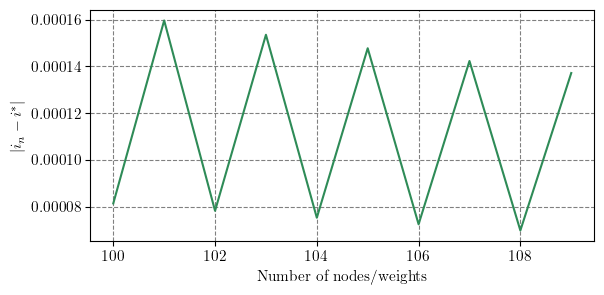

In [18]:
f = lambda x: np.abs(x) + np.abs(x+0.5) - np.abs(x-0.5)
real_integ_value = 1
difference = []
node_range = range(100,110)
for i in node_range:
    difference.append(abs(kl.integ.quadrature(f, i) - real_integ_value))
plt.plot(node_range,difference,color="seagreen")
plt.ylabel(r"$\left|i_{n}-i^{*}\right|$")
plt.xlabel("Number of nodes/weights")
plt.show()

Discontinuous function:

In [67]:
f = lambda x: np.sign(x+0.5)
real_integ_value = 1
difference = []
node_range = range(1,200)
for i in node_range:
    int_approx = kl.integ.quadrature(f, i)
    difference.append(np.abs(int_approx-real_integ_value))

Function to be integrated on the left side and convergence graph of the approximate error on the right side

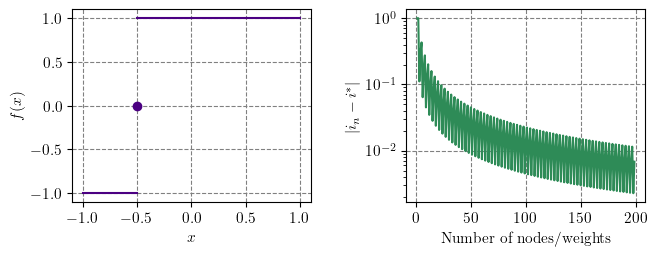

In [68]:
x1 = np.linspace(-1, -0.500001, 1000)
x2 = np.linspace(-0.499999, 1, 1000)

fig, axs = plt.subplots(1, 2, figsize=(7.4, 2.5))
axs[0].set_ylabel(r"$f(x)$")
axs[0].set_xlabel(r"$x$")
axs[0].plot(x1,f(x1),color="indigo")
axs[0].plot([-0.5],[0],"o",color="indigo")
axs[0].plot(x2,f(x2),color="indigo")

axs[1].set_ylabel(r"$\left|i_{n}-i^{*}\right|$")
axs[1].set_xlabel("Number of nodes/weights")
axs[1].plot(node_range,difference,color="seagreen")
axs[1].set_yscale('log')
fig.subplots_adjust(wspace=0.4)
fig.savefig("DiscontinuousInteg.pdf", bbox_inches='tight')
plt.show()

### 2D integrals

Testing accuracy of integrals for some 2 dimensional function

In [46]:
nx=50
ny=100
f = lambda x,y: x**2 * np.sin(y+5)
real_integ_value = 4/3 * np.sin(1)*np.sin(5)
Gq = kl.integ.quadrature_2d(f,nx,ny)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", real_integ_value)
print("error:", np.abs(Gq - real_integ_value))

Gauss-quadrature: -1.0758759383426544
actual value of integral: -1.075875938342652
error: 2.4424906541753444e-15


over <a,b>x<c,d>:

In [47]:
nx=50
ny=60
a = 5
b = 10
c = 10
d = 13
f = lambda x,y: np.sin(x+y)/np.log(5*y)
real_integ_value = 0.07714107601915701
Gq = kl.integ.quadrature_2d_int(f, nx, ny, a, b, c, d)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", real_integ_value)
print("error:", np.abs(Gq - real_integ_value))

Gauss-quadrature: 0.07714107601915583
actual value of integral: 0.07714107601915701
error: 1.1796119636642288e-15


2D convergence graph of integration approximate error: 

2.2451615932876203


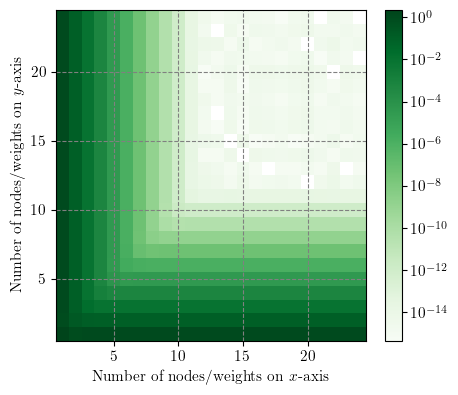

In [112]:
nx=25
ny=25
minx = 1
miny = 1
def f(x,y):
    return np.sin(x**2+y**2)
real_integ_value = 2.2451615932876237278511548966354786769990822477742323151148293005574234285315321561965191205454229705688475828176746484801183251097069730815360786111224446387498767037311418790525798393132762648969108
print(kl.integ.quadrature_2d(f, nx, ny))

xx=np.arange(minx, nx)
yy=np.arange(miny, ny)

res = []
for y in yy:
    res_line = []
    for x in xx:
        res_line.append(kl.integ.quadrature_2d(f, x, y))
    res.append(res_line)
res = np.array(res)
Z = np.array(abs(res-real_integ_value))

fig, ax = plt.subplots(figsize=(5, 4.3))
mesh = plt.pcolormesh(xx, yy, Z, cmap=colormaps['Greens'], norm=colors.LogNorm())
mesh.set_rasterized(True)
plt.xlabel("Number of nodes/weights on $x$-axis")
plt.ylabel("Number of nodes/weights on $y$-axis")
plt.colorbar()
fig.savefig("2DInteg.pdf", bbox_inches='tight')
plt.show()


2D convergence graph of integration approximate error of integral over domain <a,b>x<c,d>: 

0.07714107601915725


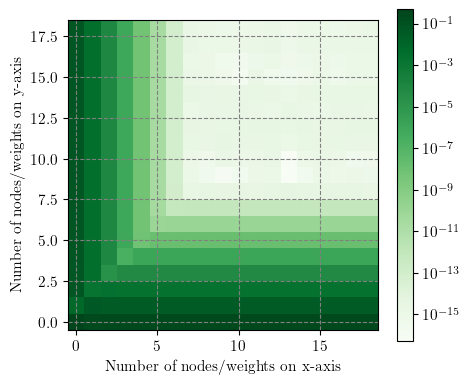

In [9]:
nx=20
ny=20
minx = 1
miny = 1
a = 5
b = 10
c = 10
d = 13
def f(x,y):
    return np.sin(x+y)/np.log(5*y)
fI = 0.07714107601915701
print(kl.integ.quadrature_2d_int(f, nx, ny, a, b, c, d))

xx=np.arange(minx, nx)
yy=np.arange(miny, ny)

X, Y = np.meshgrid(xx, yy)
res = []
for x in xx:
    res_line = []
    for y in yy:
        res_line.append(kl.integ.quadrature_2d_int(f, x, y, a, b, c, d))
    res.append(res_line)
res = np.array(res)
Z = abs(res-fI)

plt.figure(figsize=(5, 4.3))
plt.imshow(Z, origin='lower', cmap=colormaps['Greens'], norm=colors.LogNorm())
plt.xlabel("Number of nodes/weights on x-axis")
plt.ylabel("Number of nodes/weights on y-axis")
plt.colorbar()
plt.show()


2D convergence graph of integration approximate error for a non symmetric function: 

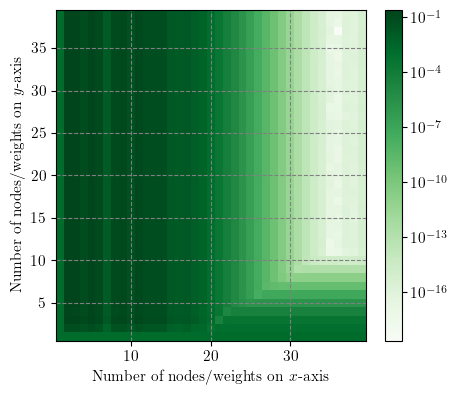

In [111]:
nx=40
ny=40
minx = 1
miny = 1
def f(x,y):
    return (x**2 * y**2 * np.cos(np.pi*(10*x+y)))
real_integ_value = -4/(25*np.pi**4)

xx=np.arange(minx, nx)
yy=np.arange(miny, ny)

res = []
for y in yy:
    res_line = []
    for x in xx:
        res_line.append(kl.integ.quadrature_2d(f, x, y))
    res.append(res_line)
res = np.array(res)
Z = np.array(abs(res-real_integ_value))

fig, ax = plt.subplots(figsize=(5, 4.3))
mesh = plt.pcolormesh(xx, yy, Z, cmap=colormaps['Greens'], norm=colors.LogNorm())
mesh.set_rasterized(True)
plt.xlabel("Number of nodes/weights on $x$-axis")
plt.ylabel("Number of nodes/weights on $y$-axis")
plt.colorbar()
fig.savefig("2DInteg2.pdf", bbox_inches='tight')
plt.show()